In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding


In [2]:
# Parameters
vocab_size = 128  # MIDI note range (0-127)
seq_length = 100  # Length of input sequences
embedding_dim = 256  # Embedding dimension for input notes
lstm_units = 512  # Number of LSTM units


In [3]:
# Define the model
model = Sequential([
    # Embedding layer to convert integer note indices to dense vectors
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=seq_length),
    
    # First LSTM layer with return_sequences=True to pass outputs to the next LSTM layer
    LSTM(lstm_units, return_sequences=True),
    
    # Second LSTM layer
    LSTM(lstm_units),
    
    # Dense layer with ReLU activation for non-linear transformation
    Dense(256, activation='relu'),
    
    # Output layer with softmax activation for note probability distribution
    Dense(vocab_size, activation='softmax')
])


/opt/homebrew/anaconda3/envs/ai_music_generator/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-12-27 13:18:16.169645: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-12-27 13:18:16.169681: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-27 13:18:16.169690: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-27 13:18:16.169711: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-27 13:18:16.169727: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus

In [4]:
# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    optimizer='adam',  # Adam optimizer for adaptive learning rate
    metrics=['accuracy']  # Evaluate accuracy during training
)


In [5]:
# Display the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

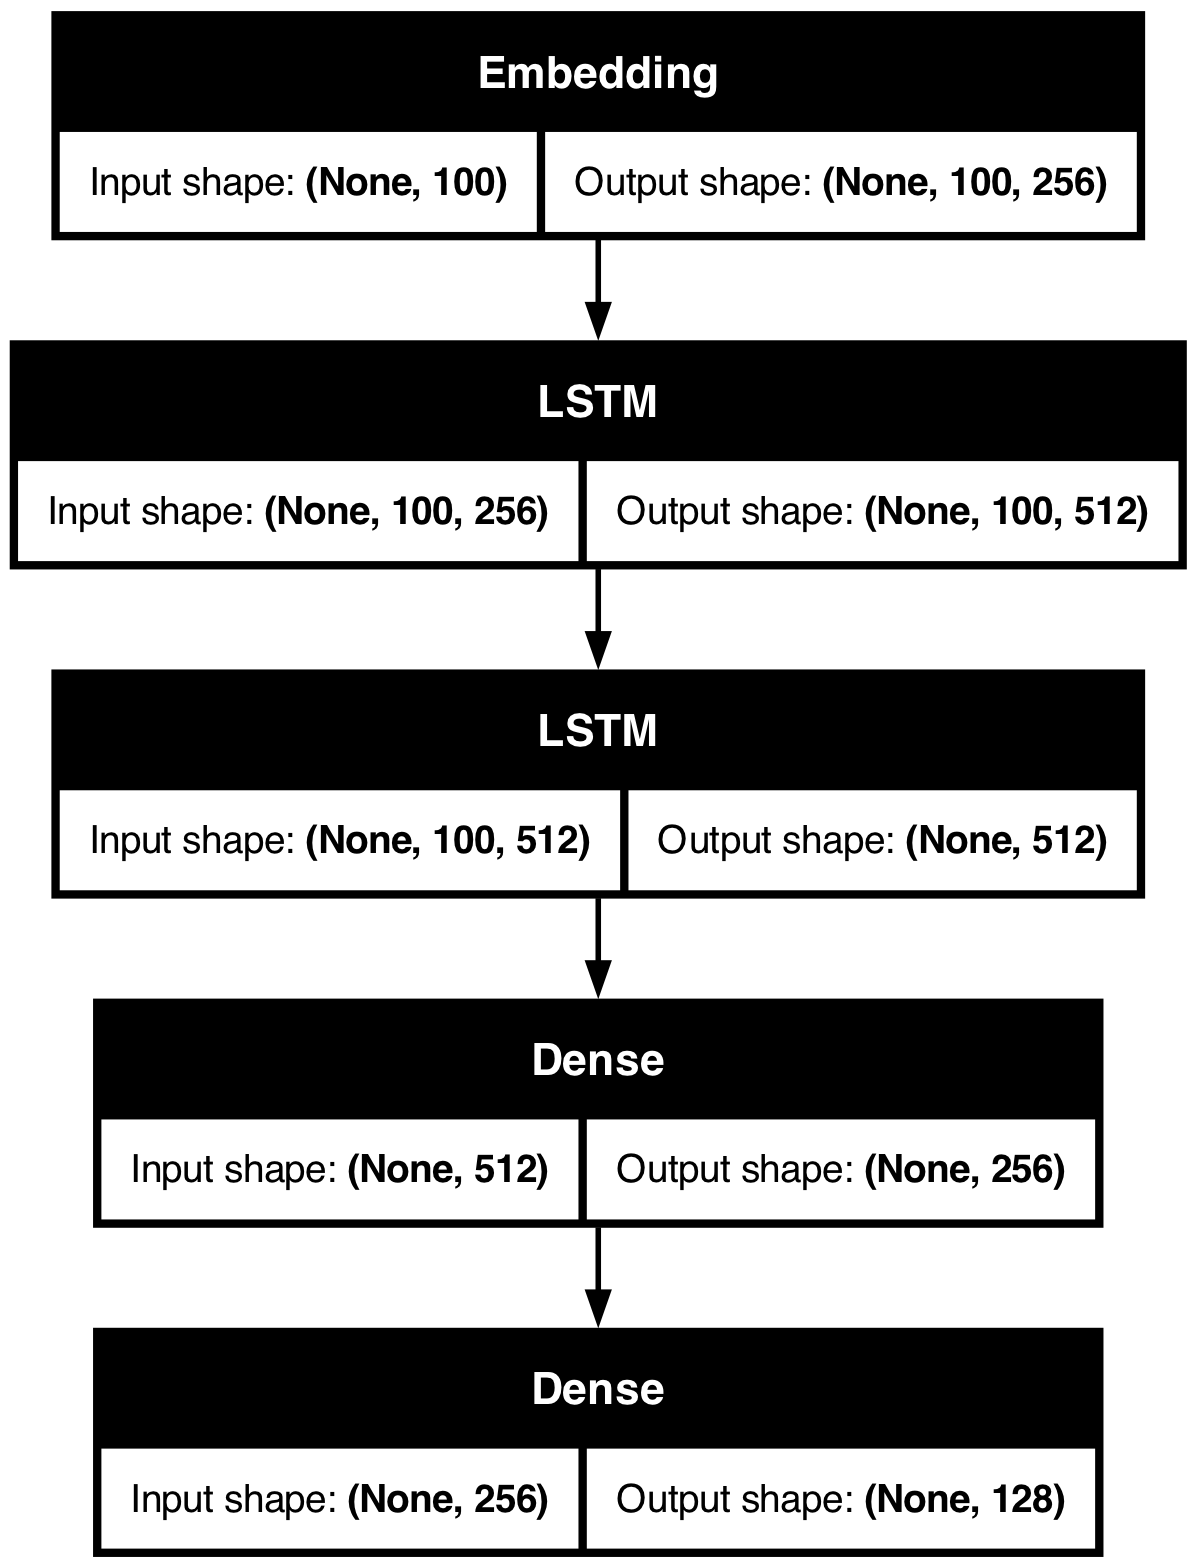

In [6]:
# Build the model explicitly with a sample input shape
model.build(input_shape=(None, seq_length))  # Batch size is dynamic (None)

# Visualize the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='rnn_model_architecture.png', show_shapes=True)


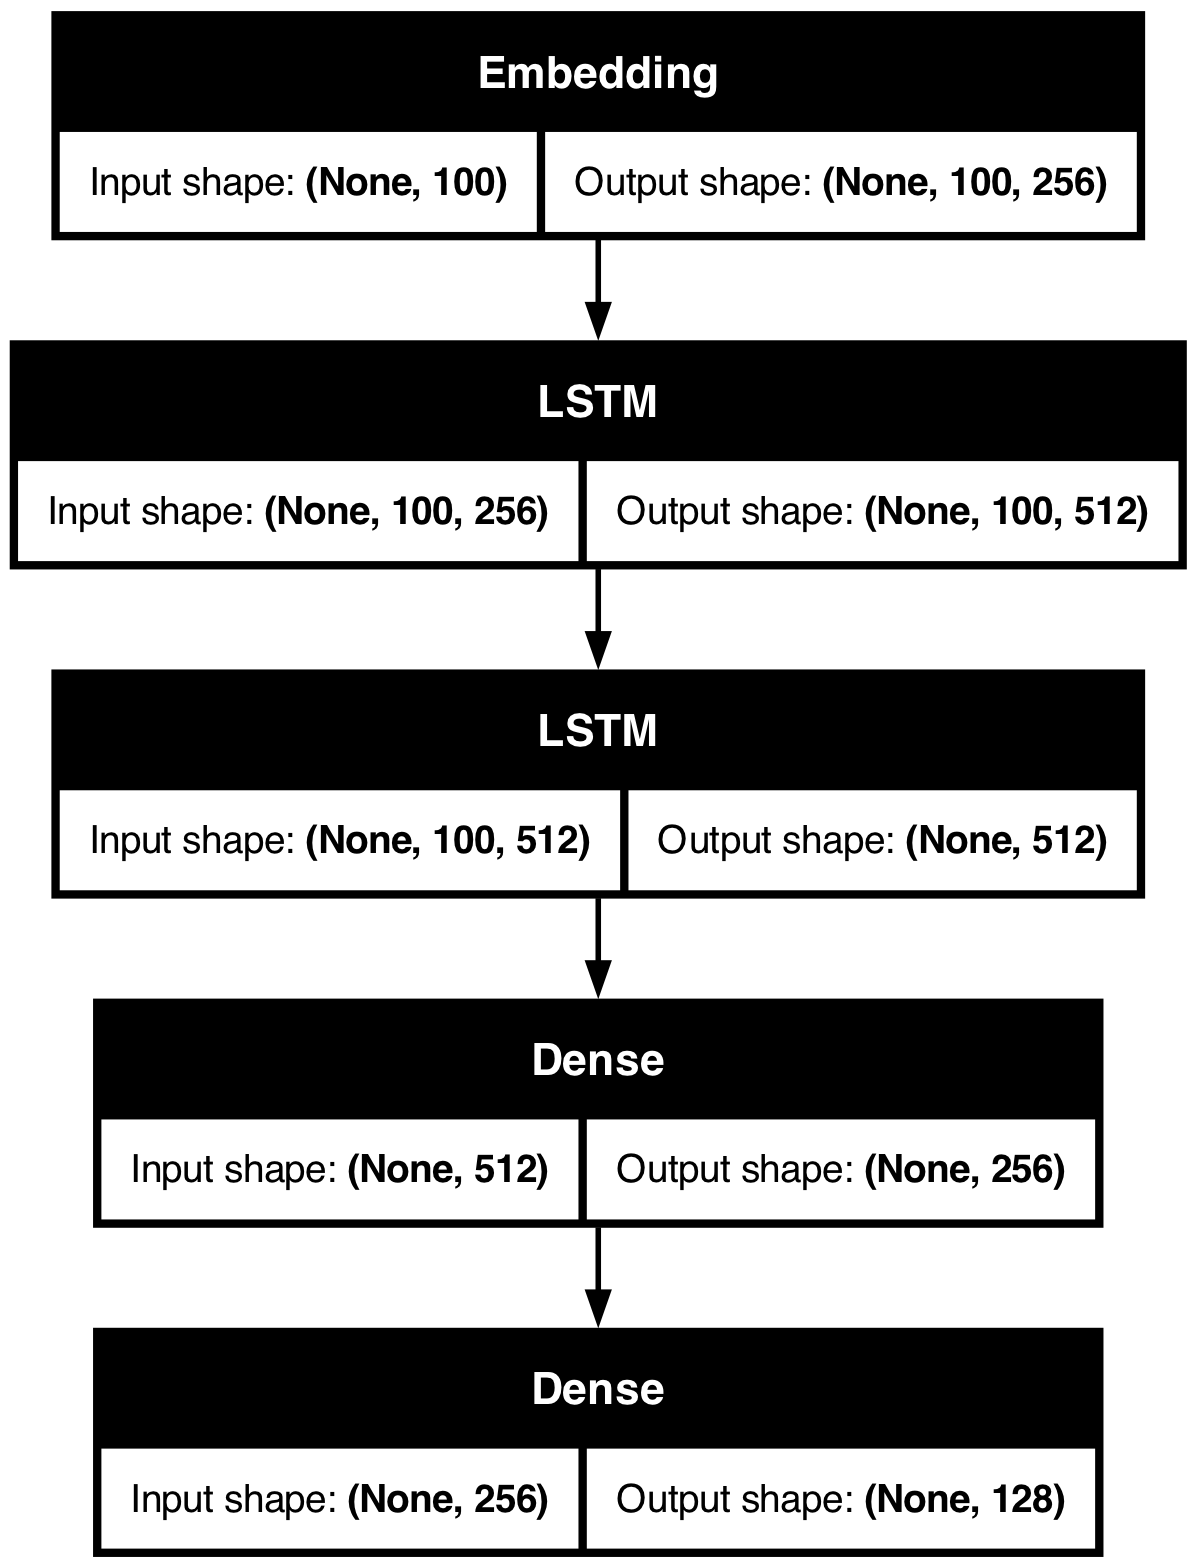

In [7]:
with open("model_architecture.json", "w") as f:
    f.write(model.to_json())

# Optional: Visualize the model architecture using TensorFlow's plot_model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True)